# Центральная предельная теорема своими руками

В качестве исследуемого распределения выберем распределение $\chi^2$. Сгенерируем из него выборку объёма 1000, далее построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины.

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.stats import chi2

%matplotlib inline

Зададим интервал от 0 до 50. Колличество степеней свободы 16.

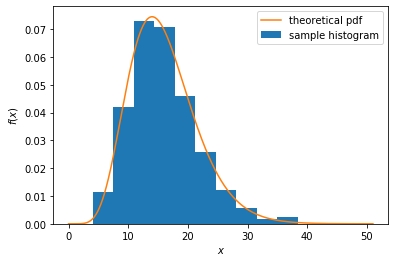

In [2]:
k = 16   # число степеней свободы
v = 1000 # объем выборки
a = 0    # начало интервала
b = 50

chi = chi2(k)
sample = chi.rvs(v)
x = np.linspace(a, b + 1, v)
pdf = chi.pdf(x)
plt.hist(sample, density=True, label='sample histogram')

plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()


Оценим распределение выборочного среднего случайной величины при разных объёмах выборок - 5, 10, 50. Информацию о среднем и дисперсии исходного распределения возьмем из википедии

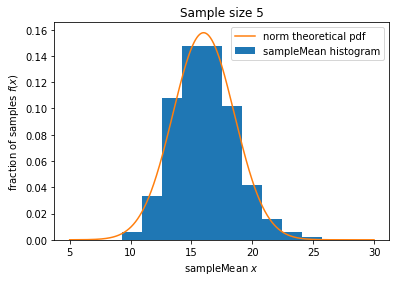

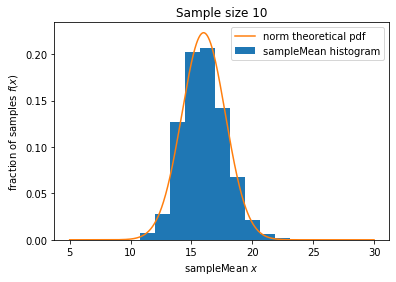

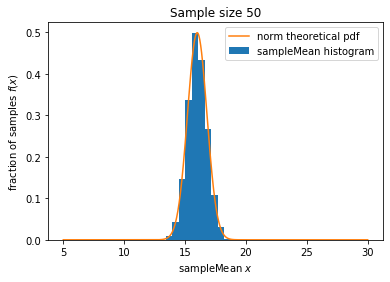

In [3]:
for n in [5, 10, 50]:
    sampleMean = []
    for rvn in range(v): # вычисляется среднее из 1000 выборок
        sampleMean.append(chi.rvs(n).mean())
    plt.hist(sampleMean, density=True, label='sampleMean histogram')
    # вычисляем pdf плотность нормального распределения с данными параметрами (каждый раз одинаково)
    norm_rv = sts.norm(k, np.sqrt(2 * k / n))
    x = np.linspace(5, 30, v)
    pdf = norm_rv.pdf(x)
    # выстраиваем на графике
    plt.plot(x, pdf, label='norm theoretical pdf')
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sampleMean $x$')
    plt.show()

Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является утверждением центральной предельной теоремы. С ростом n точность нормальной аппроксимации увеличивается.